In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
df_test = pd.read_csv('Data/test.csv')
df_gender_submission = pd.read_csv('Data/gender_submission.csv')

In [149]:
df = pd.read_csv('Data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [150]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [152]:
print("Percentage of missing values in each column:")
print(round((df.isnull().sum()/df.shape[0]).sort_values(ascending=False)*100, 2))

Percentage of missing values in each column:
Cabin          77.10
Age            19.87
Embarked        0.22
PassengerId     0.00
Name            0.00
Pclass          0.00
Survived        0.00
Sex             0.00
Parch           0.00
SibSp           0.00
Fare            0.00
Ticket          0.00
dtype: float64


In [153]:
# drop columns that are not useful for analysis and modeling
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare'], axis=1, inplace=True)

In [154]:
# Impute missing values for 'Embarked' and 'Age' columns
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df['Embarked'] = imputer.fit_transform(df[['Embarked']]).flatten()
df['Age'] = imputer.fit_transform(df[['Age']]).flatten()

In [155]:
# Verify that missing values have been filled
print("Missing values after imputation:")
print(df.isnull().sum())
print("\nDataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Missing values after imputation:
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

Dataset shape: (891, 7)

First few rows:


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


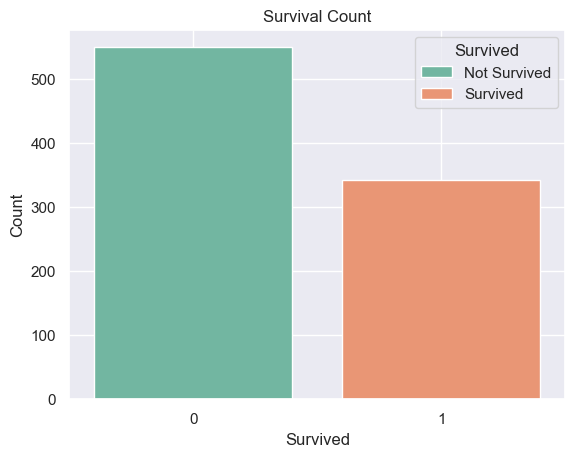

In [156]:
sns.set(style="dark")
sns.countplot(x='Survived', data=df, palette='Set2')
plt.title('Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.grid(True)
plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()

> **Interpretation**: More than 300 People who were traveling in the Titanic survived and more than 500 People who were traveling in the Titanic did not survive. The survival rate is around 38% which is quite low.

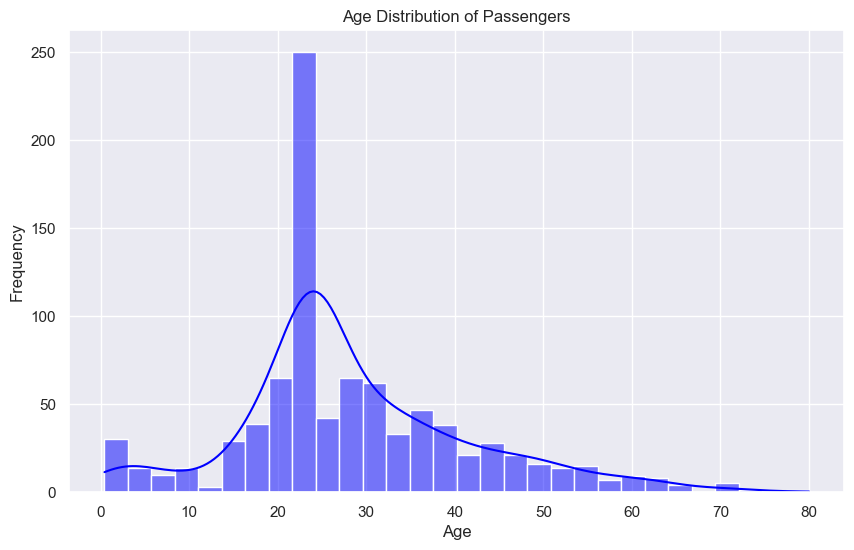

In [157]:
# In which age group were most passengers?
plt.figure(figsize=(10, 6))
sns.set(style='darkgrid')
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

> **Interpretation**: The majority of the passengers were in the age group of 20-30 years, followed by the age group of 30-40 years. The least number of passengers were in the age group of 60-70 years.

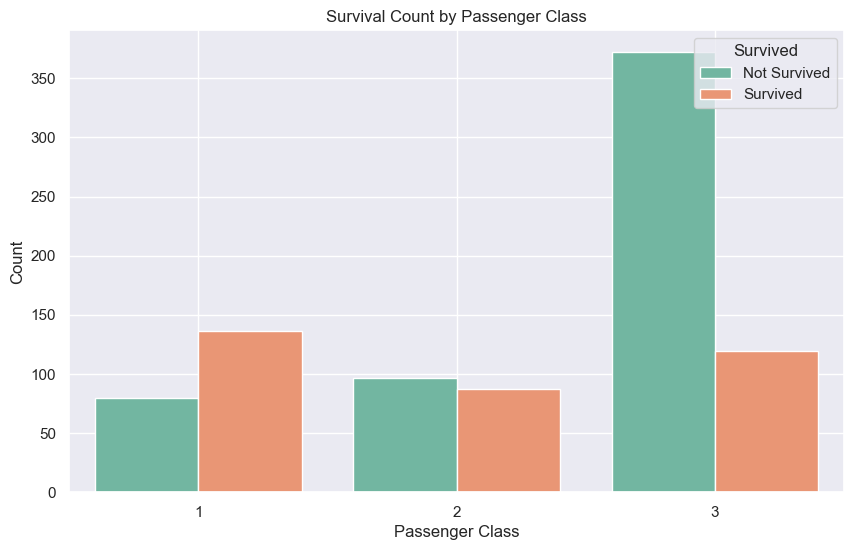

In [158]:
# Which passenger class had the highest survival rate?
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set2')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.grid(True)
plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()

> **Interpretation**: The majority of the passengers that survived were in Pclass 1 and most of the passengers that did not survive were in Pclass 3. The survival rate is highest in Pclass 1 and lowest in Pclass 3.

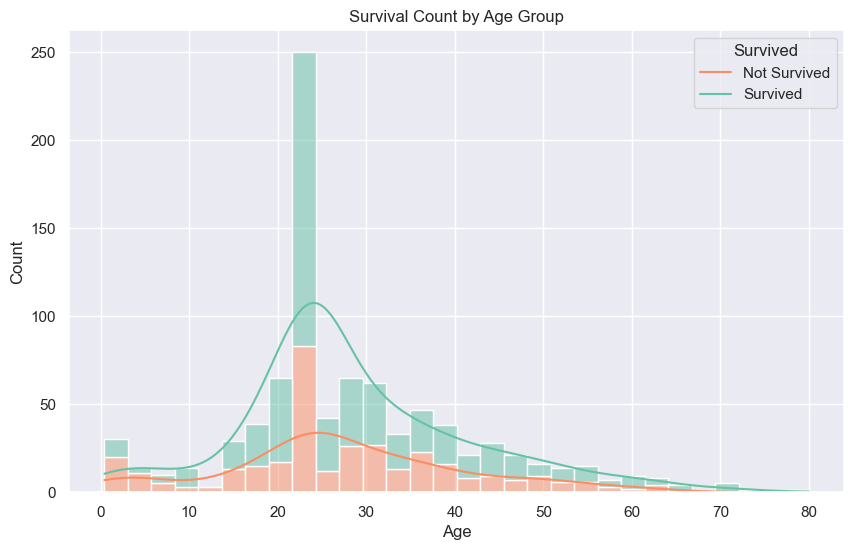

In [159]:
# which age group had the highest survival rate?
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30, kde=True, palette='Set2')
plt.title('Survival Count by Age Group')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()

> **Interpretation**: The majority of the passengers were in the age group of 20-30 years.

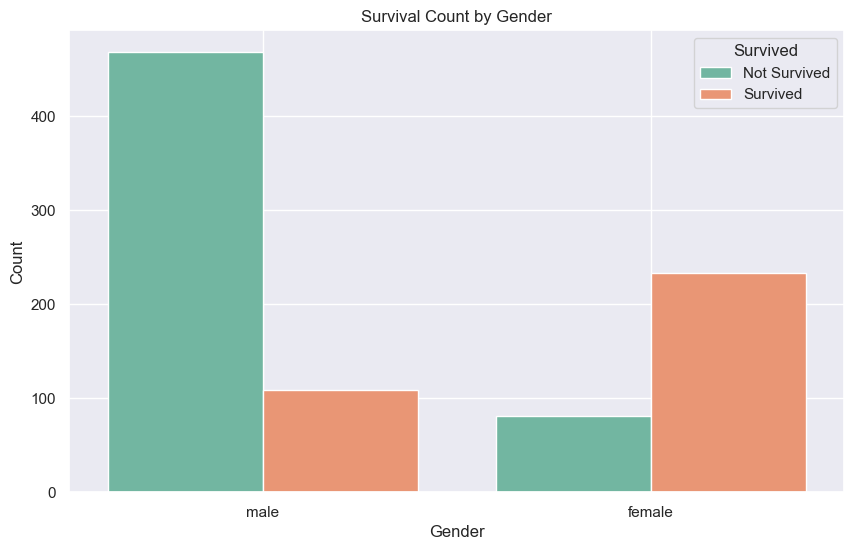

In [160]:
# Which Gender has the highest survival rate?
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set2')
plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.grid(True)
plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()

> **Interpretation**: The majority of the survivors were females, and most of the casualties were males.


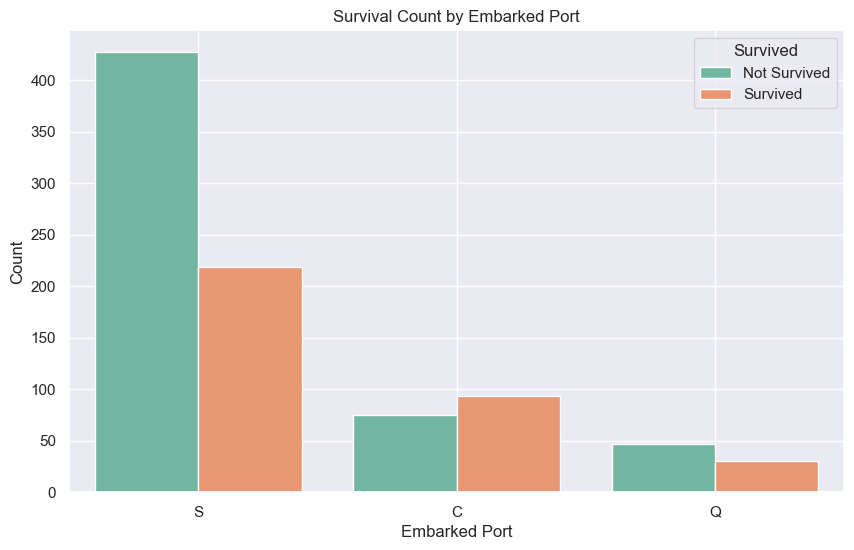

In [161]:
# Which Emarked port had the highest survival rate?
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', hue='Survived', data=df, palette='Set2')
plt.title('Survival Count by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Count')
plt.grid(True)
plt.legend(title='Survived', loc='upper right', labels=['Not Survived', 'Survived'])
plt.show()

In [162]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


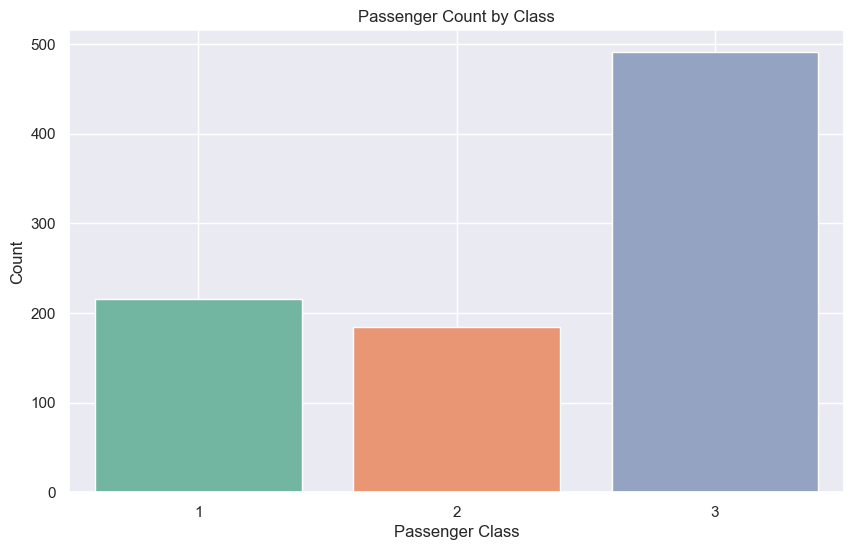

In [163]:
# Which class had the most passengers?
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', data=df, palette='Set2')
plt.title('Passenger Count by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.grid(True)
plt.show()

> **Interpretation**: The majority of the passengers were in the Class 3 category, followed by Class 1 and Class 2. The least number of passengers were in Class 2 and Most of the casualties were in Class 3 too.

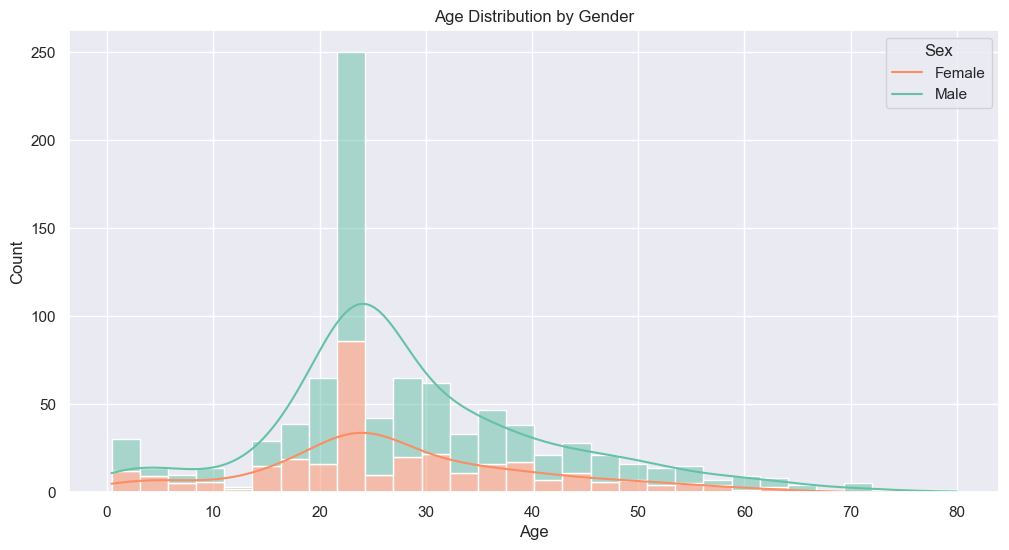

In [164]:
# Gender VS Age
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Age', hue='Sex', multiple='stack', bins=30, kde=True, palette='Set2')
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid(True)
plt.legend(title='Sex', loc='upper right', labels=['Female', 'Male'])
plt.show()

In [165]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # Adding 1 for the passenger themselves

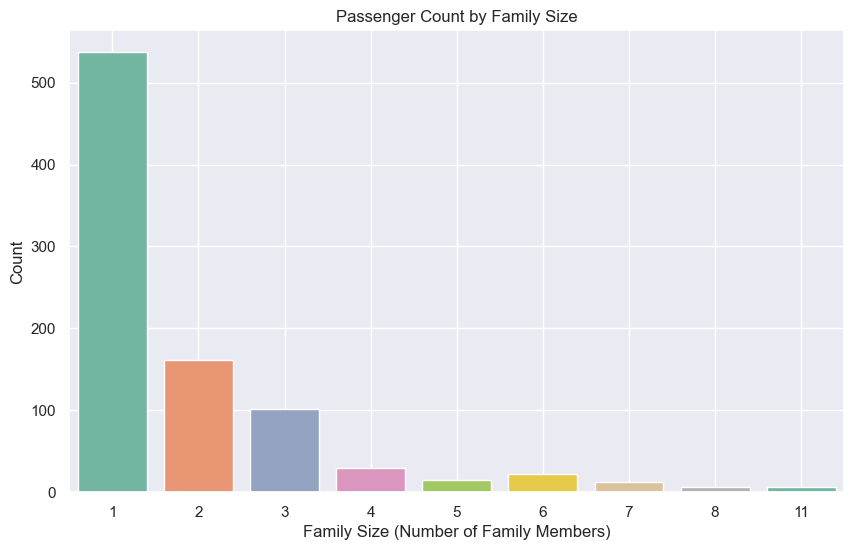

In [166]:
# How many passengers were traveling with family?
plt.figure(figsize=(10, 6))
sns.countplot(x='FamilySize', data=df, palette='Set2')
plt.title('Passenger Count by Family Size')
plt.xlabel('Family Size (Number of Family Members)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

>**Interpretation**: The majority of the passengers were traveling alone, followed by those traveling with 1 family member. Most of the casualties were also traveling alone.

## **Modeling**

In [167]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [168]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
def preprocess_data(df):
    # Encode categorical variables
    df_encoded = pd.DataFrame(encoder.fit_transform(df[['Sex', 'Embarked']]))
    df_encoded.columns = encoder.get_feature_names_out(['Sex', 'Embarked'])
    df = df.drop(['Sex', 'Embarked'], axis=1)
    df = pd.concat([df, df_encoded], axis=1)
    return df

In [169]:
def train_model(df):
    # Preprocess the data
    df_encoded = preprocess_data(df)

    # Split the data into features and target variable
    X_train = df_encoded.drop('Survived', axis=1)
    y_train = df_encoded['Survived']

    # Train a Random Forest Classifier
    global model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    return model

In [ ]:
def preprocess_test_data(df):
    # Impute missing values
    df_test['Embarked'] = imputer.transform(df_test[['Embarked']]).flatten()
    df_test['Age'] = imputer.transform(df_test[['Age']]).flatten()

    # Drop unnecessary columns
    df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare'], axis=1, inplace=True)

    # Add FamilySize feature
    df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

    # Encode categorical variables
    return df_test

KeyError: "['Survived'] not found in axis"

In [ ]:
def evaluate_model(model=model, X_test=X_test, y_test=y_test):
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy:.2f}")
    
    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Print confusion matrix
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

In [ ]:
def cross_validate_model(model=model, X=X_train, y=y_train):
    scores = cross_val_score(model, X, y, cv=5)
    print(f"\nCross-Validation Scores: {scores}")
    print(f"\nMean Cross-Validation Score: {np.mean(scores):.2f}")

In [ ]:
make_pipeline = make_pipeline(
    preprocess_data(df),
    train_model(df),
    evaluate_model(),
    cross_validate_model()
)

Model Accuracy: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179


Confusion Matrix:
[[92 13]
 [18 56]]

Cross-Validation Scores: [0.82517483 0.81118881 0.77464789 0.79577465 0.8028169 ]

Mean Cross-Validation Score: 0.80
